# Principal Component Analysis

## import library

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm

## load data

In [14]:
fname_data = 'assignment_12_data.txt'

feature = np.genfromtxt(fname_data, delimiter=',')

x = feature[:,0]
y = feature[:,1]


number_data     = np.size(feature, 0)
number_feature  = np.size(feature, 1)

## plot the input data

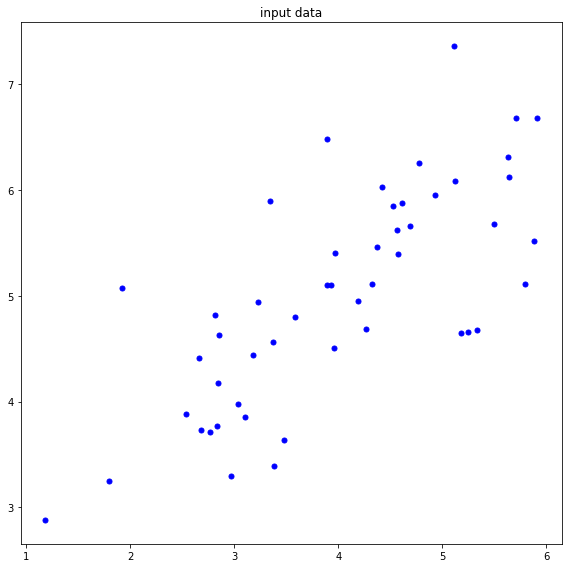

In [15]:
plt.figure(figsize=(8,8))   
plt.title('input data')

plt.scatter(x, y, color='blue', s=25, marker='o')

plt.axis('auto')
plt.tight_layout()
plt.show()

## Normalization (Z-scoring)

[-0.5233151   0.46381907 -1.14839444 -1.0540573  -0.98402134 -0.0849036
 -0.4421533   1.65512791 -0.05199109  0.49306315  0.50359481  0.32935312
  0.17431471  1.08057125 -0.99325269  1.41742932  0.60026562 -0.98061987
  0.96523968  1.02758572  1.47948257 -0.3527074   1.42096858  0.23612685
 -1.25100707 -0.65914163  0.80965876  1.55322141 -1.00960561 -0.08649669
 -0.55632233  1.62794193 -0.76240011  1.15585151 -0.52859385  0.678069
 -1.1311115   1.30118495 -1.88774615  0.28696815  0.37178115 -0.69748789
 -0.82300666  0.53397558 -0.8830707  -0.01507431 -2.41895336 -1.78281708
 -0.02929162  0.97194791]
[[-0.5233151  -1.59279489]
 [ 0.46381907  0.84034673]
 [-1.14839444 -0.58316356]
 [-1.0540573  -1.27072124]
 [-0.98402134 -0.8165806 ]
 [-0.0849036   1.46633237]
 [-0.4421533  -1.35221189]
 [ 1.65512791  1.65623047]
 [-0.05199109  0.09440519]
 [ 0.49306315  0.61245716]
 [ 0.50359481  0.38972985]
 [ 0.32935312  0.45242712]
 [ 0.17431471 -0.04749279]
 [ 1.08057125 -0.33689517]
 [-0.99325269 -

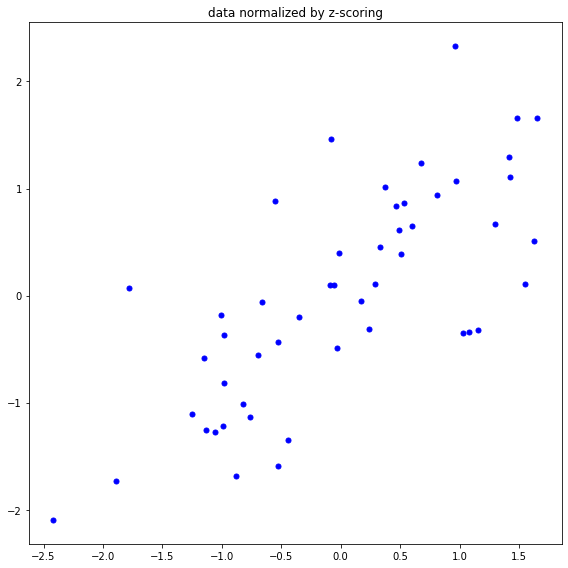

In [4]:
plt.figure(figsize=(8,8))
plt.title('data normalized by z-scoring')
# ===================================================
normal_x = (x - np.mean(x)) / np.std(x)
normal_y = (y - np.mean(y)) / np.std(y)

normal_feature = np.vstack((normal_x,normal_y)).transpose()
print(normal_x)
print(normal_feature)


print("mean of x = ", np.mean(normal_x))
print("mean of y = ", np.mean(normal_y))
print("std of x = ", np.std(normal_x))
print("std of y = ", np.std(normal_y))
plt.scatter(normal_x, normal_y, color='blue', s=25, marker='o')
plt.axis('auto')
# ===================================================
plt.tight_layout()
plt.show()

## compute covariance matrix

In [16]:
def compute_covariance(feature):
    Sigma = (np.matmul(np.transpose(feature),feature) ) / feature.shape[0]
    return Sigma



## compute principal directions

In [18]:
def compute_eigen(X): # X is sigma
    S, U = np.linalg.eig(X)
    return S, U

In [28]:
def plot_principal_direction(normal_feature):
    plt.figure(figsize=(8,8))
    plt.title('principal directions')
    Sigma = compute_covariance(normal_feature)
    S, U = compute_eigen(Sigma)

    first_pc = max(S)
    first_pc_index = np.where(S == first_pc)
    first_pc_vector = U[:, first_pc_index[0][0]]

    second_pc = max(np.delete(S, first_pc_index))
    second_pc_index = np.where(S == second_pc)
    second_pc_vector = U[:, second_pc_index[0][0]]
    origin = np.array([[0,0],[0,0]])

    plt.scatter(normal_x, normal_y, color='blue', s=25, marker='o')
    plt.quiver(*origin, first_pc_vector[0] * first_pc ,first_pc_vector[1]*first_pc, color='r', angles='xy', scale=1, scale_units='xy')
    plt.quiver(*origin, second_pc_vector[0] * second_pc,second_pc_vector[1] * second_pc, color='g', angles='xy', scale=1, scale_units='xy')

    plt.axis('auto')
    plt.tight_layout()
    plt.show()

## first principal axis

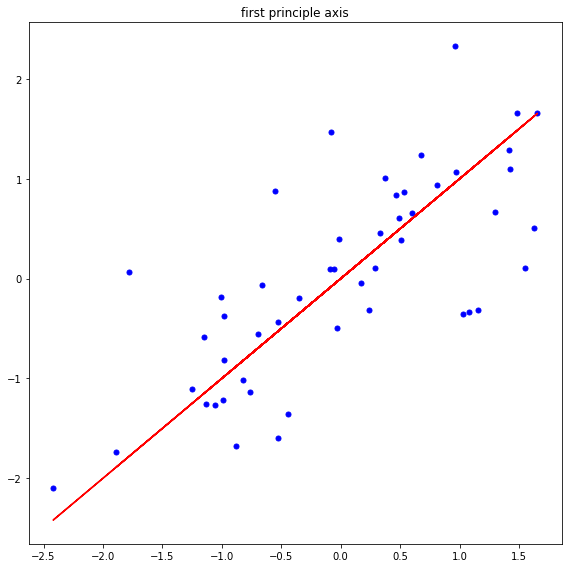

In [20]:
plt.figure(figsize=(8,8))
plt.title('first principle axis')

func = normal_x * (first_pc_vector[1] /  first_pc_vector[0])
plt.scatter(normal_x, normal_y, color='blue', s=25, marker='o')
plt.plot(normal_x, func, 'r')
plt.tight_layout()
plt.show()

## second principal axis

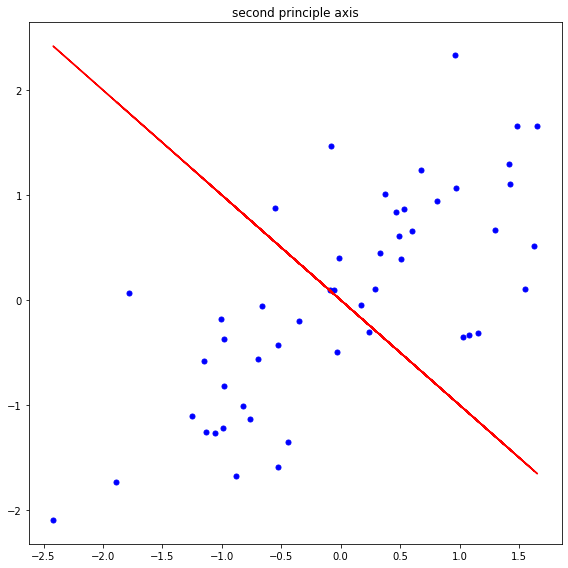

In [21]:
plt.figure(figsize=(8,8))
plt.title('second principle axis')
func2 = normal_x *(second_pc_vector[1] /  second_pc_vector[0])
plt.scatter(normal_x, normal_y, color='blue', s=25, marker='o')
plt.plot(normal_x, func2, 'r')
plt.tight_layout()

plt.show()

## compute the projection of point onto the line

In [23]:
def compute_projection_onto_line(feature, vector):
    v_norm = np.sqrt(sum(vector**2))
    v_norm_vector =  vector / v_norm
    projection = np.zeros((50,2))

    temp = np.dot(feature,vector) / v_norm
    for i in range(temp.shape[0]):
        projection[i] = (temp[i]*v_norm_vector)

    return projection
projection = compute_projection_onto_line(normal_feature, first_pc_vector)


## projcet to the first principal axis

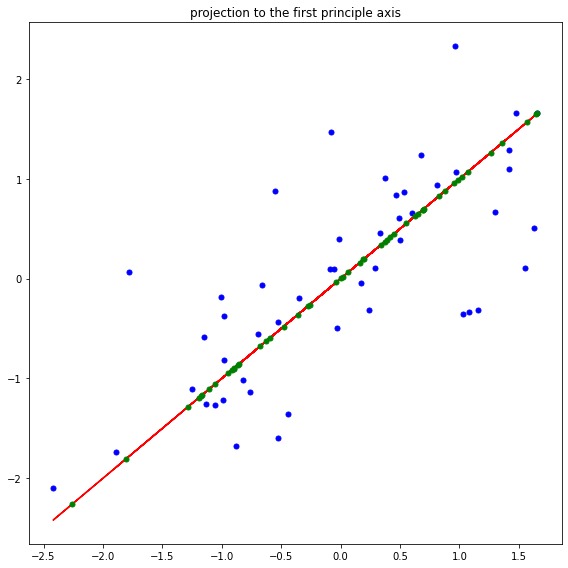

In [24]:
plt.figure(figsize=(8,8))
plt.title('projection to the first principle axis')
func = normal_x *(first_pc_vector[1] /  first_pc_vector[0])
plt.scatter(normal_x, normal_y, color='blue', s=25, marker='o')

projection = compute_projection_onto_line(normal_feature, first_pc_vector)
plt.scatter(projection[:, 0],projection[:,1], color='green', s=25, zorder=1)
plt.plot(normal_x, func, 'r', zorder=-1)
plt.tight_layout()
plt.show()

## projcet to the second principal axis

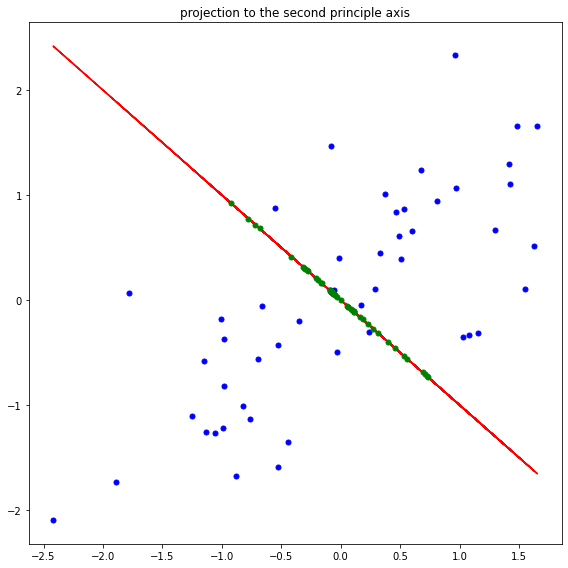

In [25]:
plt.figure(figsize=(8,8))
plt.title('projection to the second principle axis')
# ===================================================
func2= normal_x *(second_pc_vector[1] /  second_pc_vector[0])
plt.scatter(normal_x, normal_y, color='blue', s=25, marker='o')

projection = compute_projection_onto_line(normal_feature, second_pc_vector)
plt.scatter(projection[:, 0],projection[:,1], color='green', s=25, zorder=1)
plt.plot(normal_x, func2, 'r', zorder=-1)
# ===================================================
plt.tight_layout()
plt.show()

## connect original data to the projection onto the first principal axis

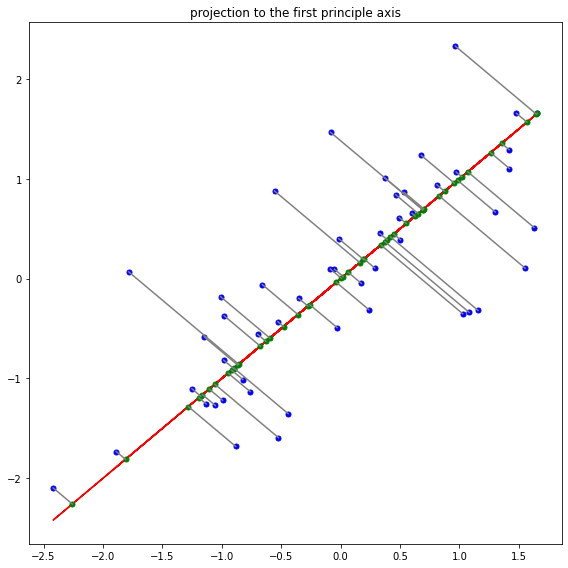

In [26]:
plt.figure(figsize=(8,8))
plt.title('projection to the first principle axis')
# ===================================================
func = normal_x *(first_pc_vector[1] /  first_pc_vector[0])
plt.scatter(normal_x, normal_y, color='blue', s=25, marker='o')

projection = compute_projection_onto_line(normal_feature, first_pc_vector)
plt.scatter(projection[:, 0],projection[:,1], color='green', s=25, zorder=1)
plt.plot(normal_x, func, 'r', zorder=-1)

for i in range(feature.shape[0]):
    plt.plot([normal_x[i], projection[:, 0][i]], [normal_y[i], projection[:, 1][i]],  'gray')
# ===================================================
plt.tight_layout()
plt.show()

## connect original data to the projection onto the second principal axis

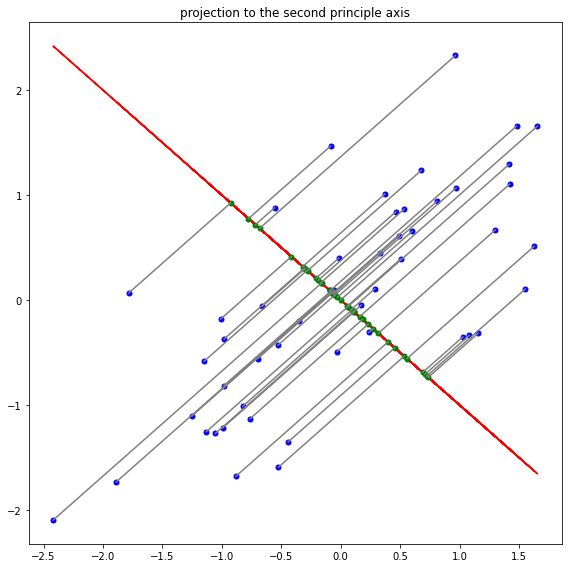

In [27]:
plt.figure(figsize=(8,8))
plt.title('projection to the second principle axis')
# ===================================================
func2 = normal_x *(second_pc_vector[1] /  second_pc_vector[0])
plt.scatter(normal_x, normal_y, color='blue', s=25, marker='o')

projection = compute_projection_onto_line(normal_feature, second_pc_vector)
plt.scatter(projection[:, 0],projection[:,1], color='green', s=25, zorder=1)
plt.plot(normal_x, func2, 'r', zorder=-1)

for i in range(feature.shape[0]):
    plt.plot([normal_x[i], projection[:, 0][i]], [normal_y[i], projection[:, 1][i]], 'gray')
# ===================================================
plt.tight_layout()
plt.show()

#### Note that the title in the above figure is wrong. It should be "second principle axis" instead of "first principle axis"

***

# results

***

### 1. plot the input data after the normalization using Z-scoring in blue

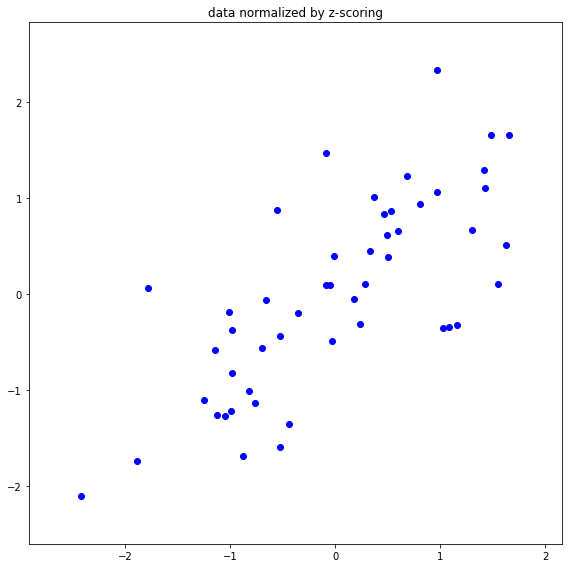

***

### 2. plot the first principal component in red and the second principal components in green on the normalized data in blue

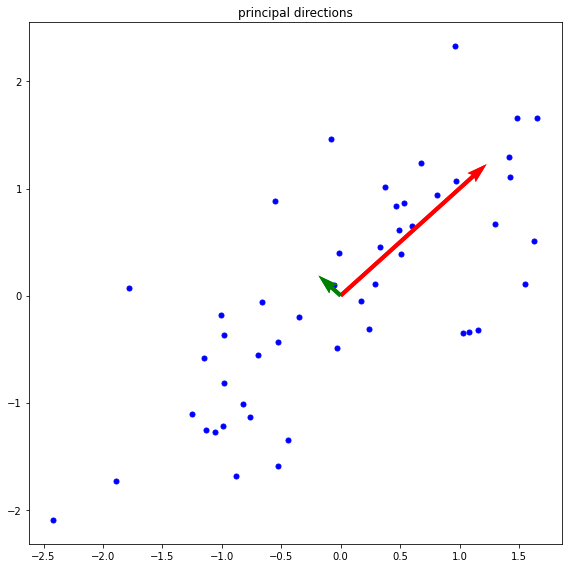

In [29]:
plot_principal_direction(normal_feature)

***

### 3. plot the first principal axis in red on the normalized data in blue

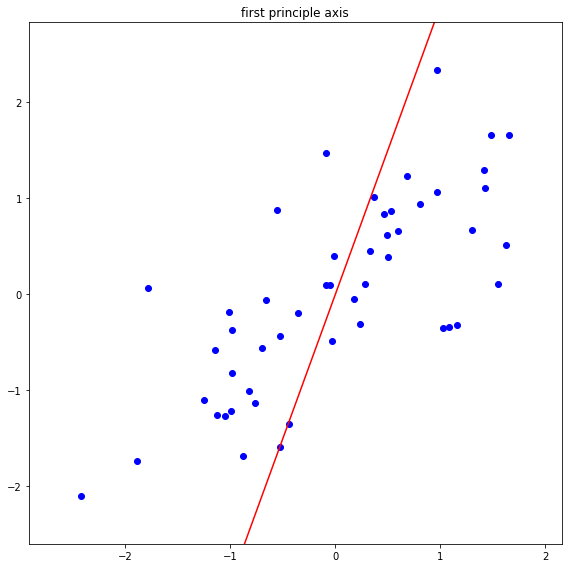

***

### 4. plot the second principal axis in red on the normalized data in blue

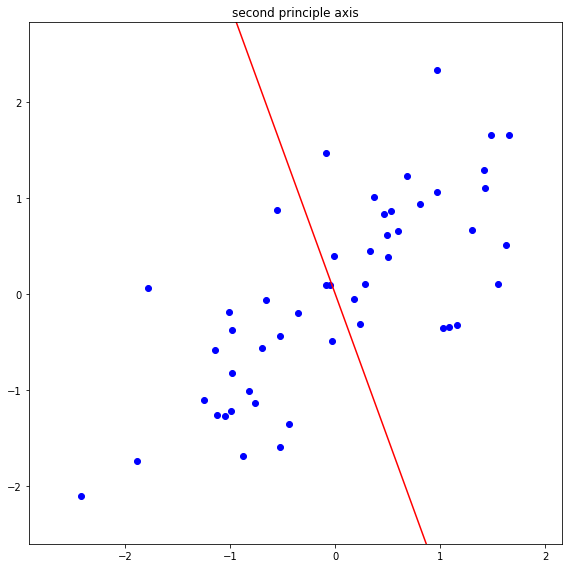

***

### 5. plot the projection of data in green onto the first principal axis in red

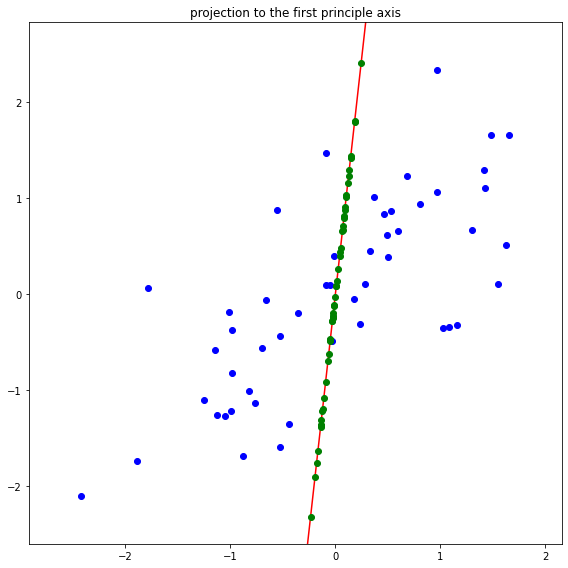

***

### 6. plot the projection of data in green onto the second principal axis in red

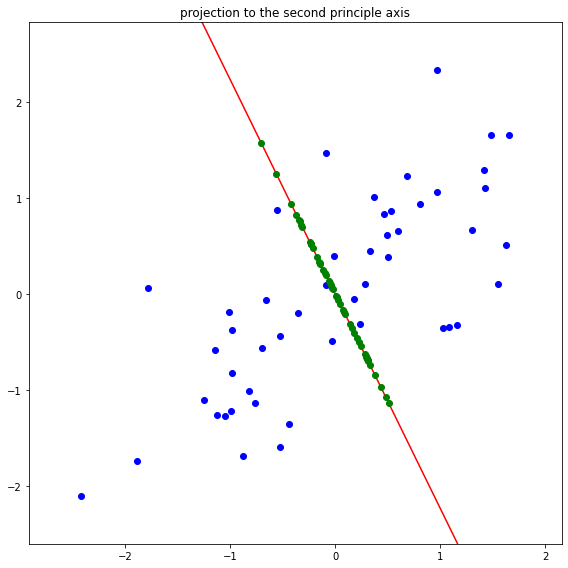

***

### 7. plot the projection line in grey onto the first principal axis

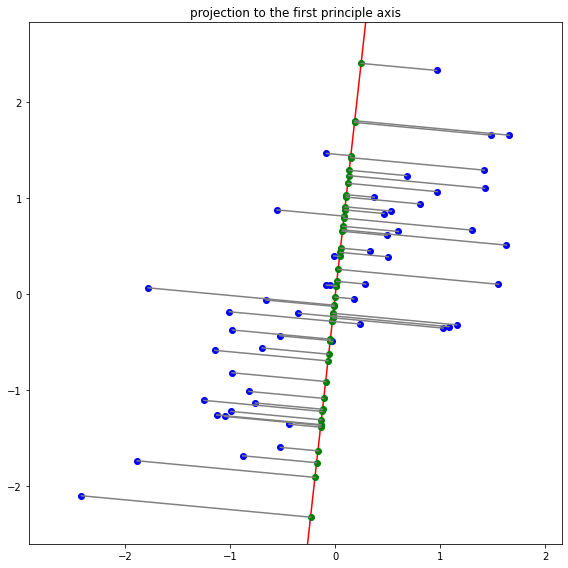

***

### 8. plot the projection line in grey onto the second principal axis

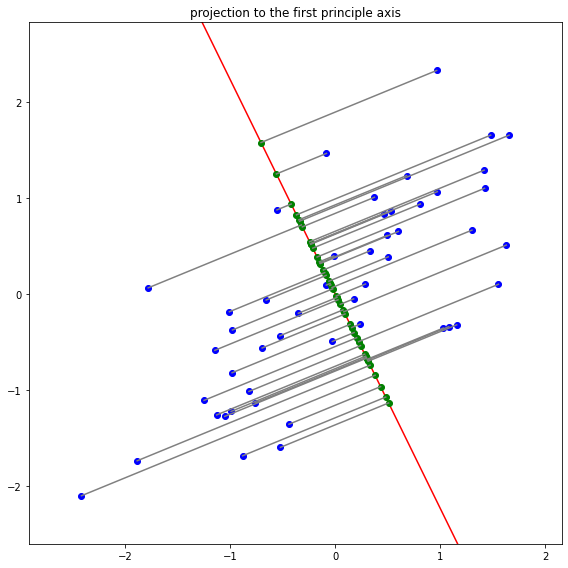

#### Note that the title in the above figure is wrong. It should be "second principle axis" instead of "first principle axis"

***